In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.stattools import adfuller as ADF
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Import Data
data = pd.read_excel("Data_1.xlsx") 
date = data.Period.apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
data = data.set_index(date[:]) 
df = data.iloc[:-2,:]
df.tail()

,Period,GDP At Current Market Prices,Goods Producing Industries,Manufacturing,Construction,Utilities,Other Goods Industries *,Services Producing Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Finance & Insurance,Business Services,Other Services Industries,Ownership Of Dwellings,Add: Taxes On Products,Gross Value Added At Basic Prices
Period,,,,,,,,,,,,,,,,,,
2018-10-01,20181001,131359.4,34480.1,28628.8,4390.0,1423.4,37.9,86369.6,22622.0,8141.5,2516.2,5166.3,15988.1,17930.1,14005.4,4510.9,5998.8,125360.6
2019-01-01,20190101,125745.4,31413.5,25482.6,4461.1,1434.8,35.0,83690.9,19861.6,7570.2,2491.7,5000.1,16395.2,17609.6,14762.5,4461.2,6179.8,119565.6
2019-04-01,20190401,125250.6,30958.9,25134.5,4269.5,1520.0,34.9,83036.4,20624.8,7958.1,2446.2,5248.9,16595.1,17689.3,12474.0,4562.3,6693.0,118557.6
2019-07-01,20190701,127910.5,32894.3,26921.0,4399.2,1532.2,41.9,83959.8,20833.8,7993.8,2654.3,5085.2,16478.3,17727.0,13187.4,4644.0,6412.4,121498.1
2019-10-01,20191001,128661.2,29195.4,22973.1,4659.5,1524.0,38.8,88154.1,21858.3,8619.8,2644.9,5428.8,17252.1,18450.2,13900.0,4694.9,6616.8,122044.4


In [3]:
# Drop subtotals columns
df = df.drop(columns = ["Period",
                        "Goods Producing Industries",
                        "Services Producing Industries",
                        "Gross Value Added At Basic Prices"], axis = 1) 

# Rank Top Industrial Sectors
df.iloc[:,1:].sum().sort_values(ascending = False) 

Manufacturing                    1693475.8
Wholesale & Retail Trade         1259614.8
Business Services                 995202.6
Finance & Insurance               884565.4
Other Services Industries         802664.0
Transportation & Storage          632465.1
Add: Taxes On Products            432069.2
Construction                      366040.1
Ownership Of Dwellings            293883.9
Information & Communications      286231.5
Accommodation & Food Services     175834.9
Utilities                         120437.0
Other Goods Industries *            9506.2
dtype: float64

In [4]:
# Extract the top 4 industry
df = df[["GDP At Current Market Prices","Manufacturing","Wholesale & Retail Trade","Business Services","Finance & Insurance"] ]
df.tail()

,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,
2018-10-01,131359.4,28628.8,22622.0,17930.1,15988.1
2019-01-01,125745.4,25482.6,19861.6,17609.6,16395.2
2019-04-01,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,128661.2,22973.1,21858.3,18450.2,17252.1


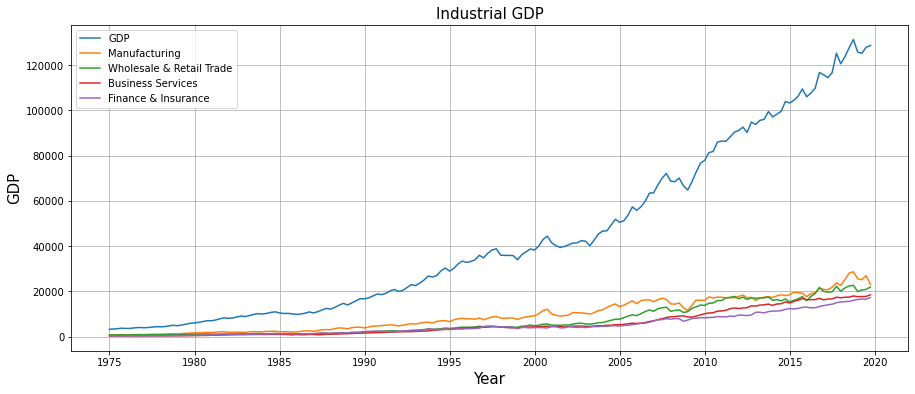

In [5]:
# Visualize the Data
plt.figure(figsize = (15,6))
plt.plot(df.index, df.iloc[:,0], label = "GDP")
plt.plot(df.index, df.iloc[:,1], label = "Manufacturing")
plt.plot(df.index, df.iloc[:,2], label = "Wholesale & Retail Trade")
plt.plot(df.index, df.iloc[:,3], label = "Business Services")
plt.plot(df.index, df.iloc[:,4], label = "Finance & Insurance")
plt.title("Industrial GDP", fontsize = 15)
plt.legend()
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.grid()

In [6]:
#Log all the data and create new columns
df.insert(0, 'Log_GDP', df['GDP At Current Market Prices'].apply(np.log))
df.insert(0, 'Log_F', df['Finance & Insurance'].apply(np.log))
df.insert(0, 'Log_B', df['Business Services'].apply(np.log))
df.insert(0, 'Log_W', df['Wholesale & Retail Trade'].apply(np.log))
df.insert(0, 'Log_M', df['Manufacturing'].apply(np.log))
df.tail()

,Log_M,Log_W,Log_B,Log_F,Log_GDP,GDP At Current Market Prices,Manufacturing,Wholesale & Retail Trade,Business Services,Finance & Insurance
Period,,,,,,,,,,
2018-10-01,10.262168,10.026678,9.794236,9.679600,11.785692,131359.4,28628.8,22622.0,17930.1,15988.1
2019-01-01,10.145751,9.896543,9.776199,9.704744,11.742015,125745.4,25482.6,19861.6,17609.6,16395.2
2019-04-01,10.131997,9.934250,9.780715,9.716863,11.738072,125250.6,25134.5,20624.8,17689.3,16595.1
2019-07-01,10.200662,9.944332,9.782844,9.709800,11.759086,127910.5,26921.0,20833.8,17727.0,16478.3
2019-10-01,10.042079,9.992336,9.822830,9.755689,11.764938,128661.2,22973.1,21858.3,18450.2,17252.1


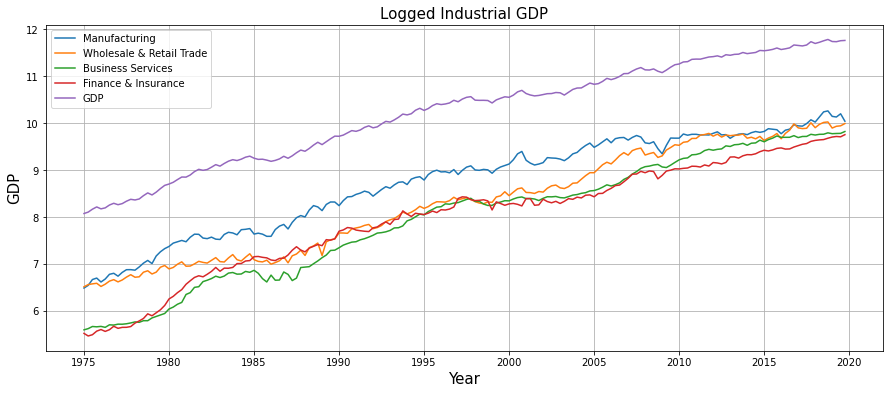

In [7]:
# Visualize the Logged Data
plt.figure(figsize = (15,6))
plt.plot(df.iloc[:,0], label = "Manufacturing")
plt.plot(df.iloc[:,1], label = "Wholesale & Retail Trade")
plt.plot(df.iloc[:,2], label = "Business Services")
plt.plot(df.iloc[:,3], label = "Finance & Insurance")
plt.plot(df.iloc[:,4], label = "GDP")
plt.title("Logged Industrial GDP", fontsize = 15)
plt.legend()
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.grid()

## Business Service Sector

#### 1. Data wranggling and determine of ARIMA order

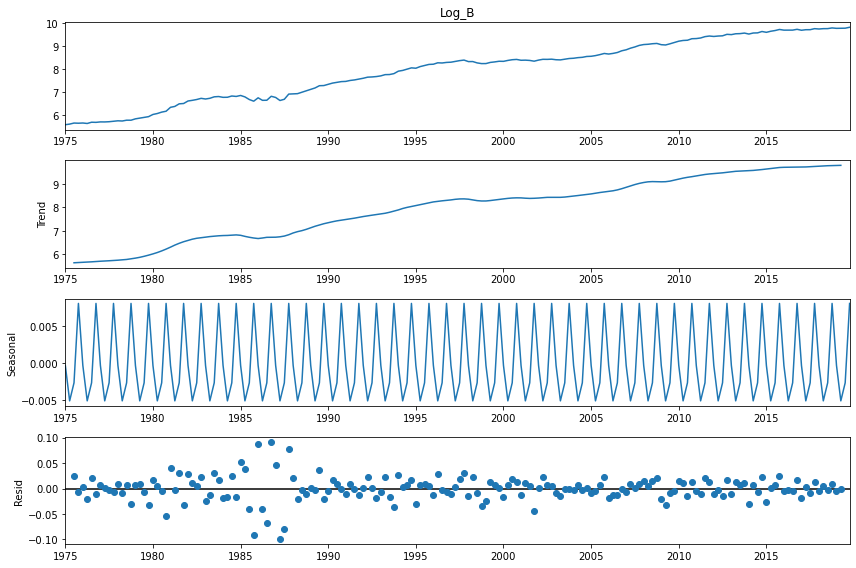

In [8]:
# Decompose Business Service Sector and extract the trend
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['Log_B'])
df_trend = decompose_result.trend.dropna()
df_season = decompose_result.seasonal.dropna()
df_residual = decompose_result.resid.dropna()
plt.rcParams["figure.figsize"] = (12, 8)
fig = decompose_result.plot()

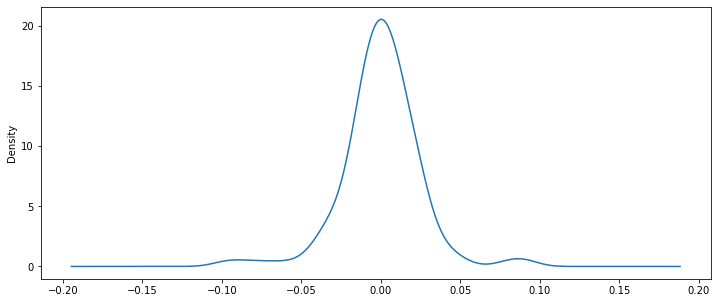

count    176.000000
mean       0.000105
std        0.024466
min       -0.098990
25%       -0.010678
50%        0.000489
75%        0.011979
max        0.092421
Name: resid, dtype: float64

In [9]:
df_residual.plot(kind = 'kde', figsize=(12, 5))
plt.show()
df_residual.describe()

In [10]:
# Check the Stability of trend using ADF test
from statsmodels.tsa.stattools import adfuller as ADF
result = ADF(df_trend)
print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])
critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -2.2954205745059397
p-value: 0.17345
Critical value (1%): -3.472
Critical value (5%): -2.880
Critical value (10%): -2.576


In [11]:
# Check the Stability of trend after first differencing using ADF test
first_diff = df_trend.diff().dropna()

result = ADF(first_diff)
print('ADF statistic:',  result[0])
print('p-value: %.5f' % result[1])
critical_values = result[4]
for key, value in critical_values.items():
    print('Critical value (%s): %.3f' % (key, value))

ADF statistic: -4.016521830986583
p-value: 0.00133
Critical value (1%): -3.472
Critical value (5%): -2.880
Critical value (10%): -2.576


`Interpretation`

- The trend is stable at first differencing

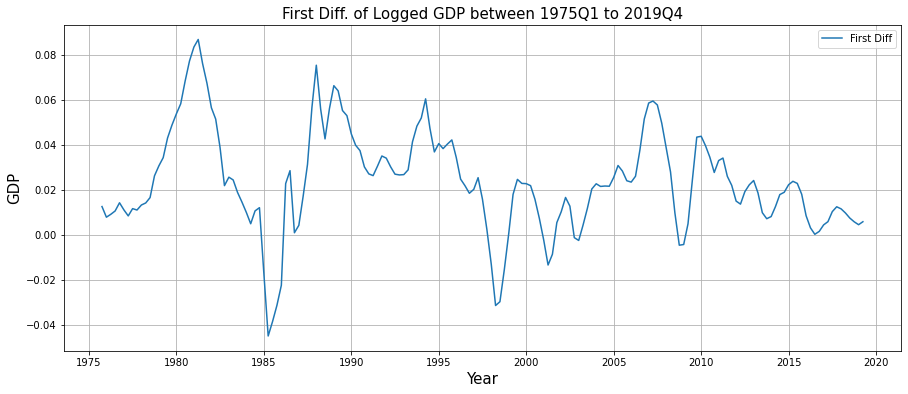

In [12]:
# Visualize the trend after first differencing
plt.figure(figsize = (15,6))
plt.plot(first_diff.index, first_diff, label = "First Diff")
plt.title("First Diff. of Logged GDP between 1975Q1 to 2019Q4", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("GDP", fontsize = 15)
plt.legend()
plt.grid()

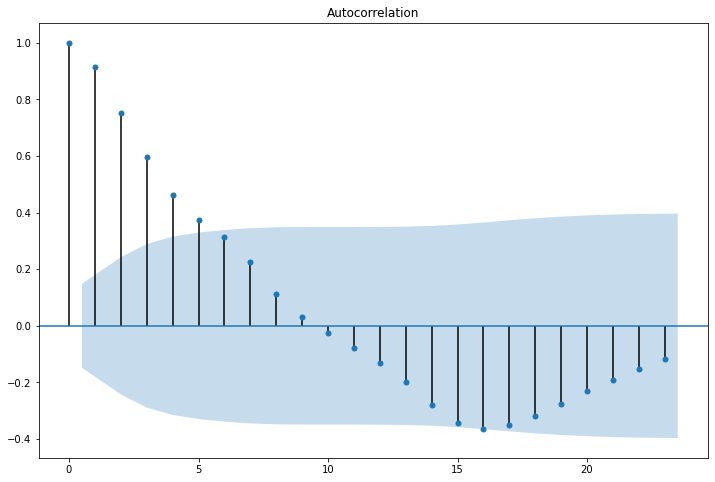

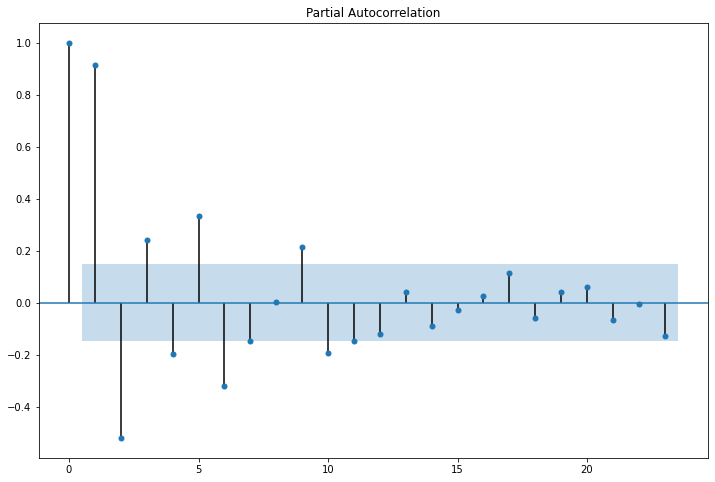

In [13]:
# use ACF and PACF to determine the AR and MA Order
acf_plot = plot_acf(first_diff)
pacf_plot = plot_pacf(first_diff, method = "ywm")

`Interpretation`

- According to PACF and ACF chart, the AR and MR order should be (2,5)

#### 2. Fit Into ARIMA Model

In [14]:
#Set Order Sequence and prepare training & test set
my_order = (2,1,5)
train_end = datetime(2014,10,1)
test_start = datetime(2015,1,1)
train_data = df_trend.loc[:train_end]
test_data = df_trend.loc[test_start:]

In [15]:
#Fit data to ARIMA Model
model = ARIMA(train_data, order = my_order)
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.trend   No. Observations:                  157
Model:                 ARIMA(2, 1, 5)   Log Likelihood                 585.248
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 05 Nov 2020   AIC                          -1152.496
Time:                        16:19:54   BIC                          -1124.990
Sample:                    10-01-1975   HQIC                         -1141.325
                         - 10-01-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0251      0.005      4.765      0.000       0.015       0.035
ar.L1.D.trend     0.8855      0.172      5.149      0.000       0.548       1.223
ar.L2.D.trend    -0.0521      0.107     

#### 3. Diagnostic test

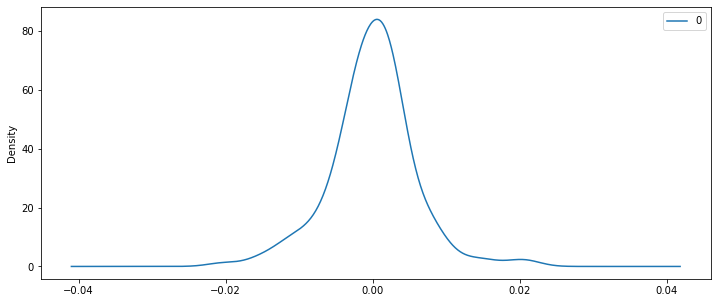

In [16]:
#visualize the distribution of residule values
resid = pd.DataFrame(model_fit.resid)
resid.plot(kind = 'kde', figsize=(12, 5))
plt.show()

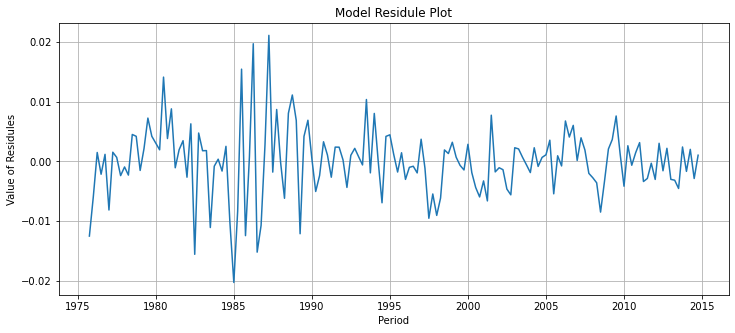

,0
count,157.000000
mean,-0.000056
std,0.005826
min,-0.020285
25%,-0.002742
50%,0.000360
75%,0.002617
max,0.021103


In [17]:
#visualize the residule values
plt.figure(figsize = (12,5))
plt.plot(resid.index,resid)
plt.title("Model Residule Plot")
plt.ylabel("Value of Residules")
plt.xlabel("Period")
plt.xticks()
plt.grid()
plt.show()
resid.describe()

In [18]:
#check autocorrelation of residues using durbin watson test
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(resid)
out

array([1.91990915])

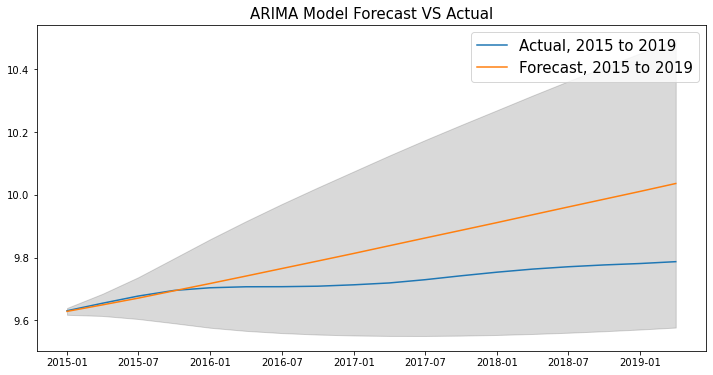

In [19]:
#visualize the forecast for the period between 2015 and 2019
fc, se, conf = model_fit.forecast(18, alpha = 0.05)
fc_series = pd.Series(fc, index = test_data.index)
lower_series = pd.Series(conf[:,0], index = test_data.index)
upper_series = pd.Series(conf[:,1], index = test_data.index)
plt.figure(figsize = (12,6))
plt.plot(test_data, label = "Actual, 2015 to 2019")
plt.plot(fc_series, label = "Forecast, 2015 to 2019")
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title("ARIMA Model Forecast VS Actual", fontsize = 15)
plt.xticks()
plt.legend(fontsize = 15)
plt.show()

#### 4. Prediction of 2020 and 2021 Business Service Sector GDP

In [20]:
#extract the trend between 1975 to 2019 for data Training
decompose_result_1 = seasonal_decompose(np.log(data.loc[:,"Business Services"]))
df_trend_1 = decompose_result_1.trend.dropna()

In [21]:
#fit data into ARIMA model
train_data_1 = df_trend_1
my_order = (2,1,5)
model_B = ARIMA(train_data_1, order = my_order)
model_B_fit = model_B.fit(disp = 0)
print(model_B_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.trend   No. Observations:                  177
Model:                 ARIMA(2, 1, 5)   Log Likelihood                 653.072
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 05 Nov 2020   AIC                          -1288.145
Time:                        16:19:56   BIC                          -1259.559
Sample:                    10-01-1975   HQIC                         -1276.551
                         - 10-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0202      0.007      3.077      0.002       0.007       0.033
ar.L1.D.trend     0.9183      0.159      5.763      0.000       0.606       1.231
ar.L2.D.trend    -0.0432      0.110     

[Text(0.5, 1.0, 'Forecase VS Actual GDP')]

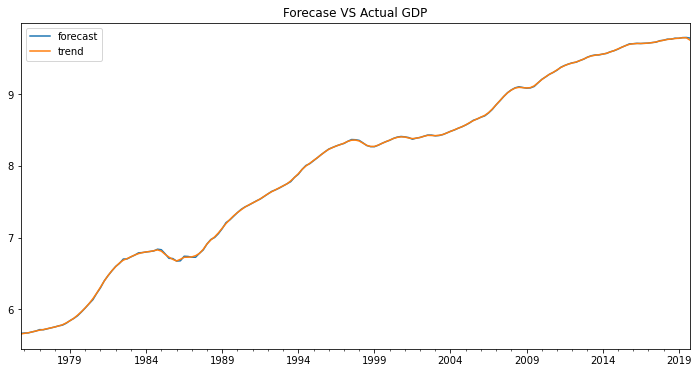

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
fig = model_B_fit.plot_predict(dynamic=False, ax = ax)
ax.set(title='Forecase VS Actual GDP')

In [23]:
#generate forecast data for 2020 to 2021
fc_series = model_B_fit.predict(178,189,typ = 'levels') # Forecast from 2020 to 2022
fc, se, conf = model_B_fit.forecast(12, alpha = 0.05) # Forecast from 2020 to 2022
lower_series = pd.Series(conf[:,0], fc_series.index)
upper_series = pd.Series(conf[:,1], fc_series.index)

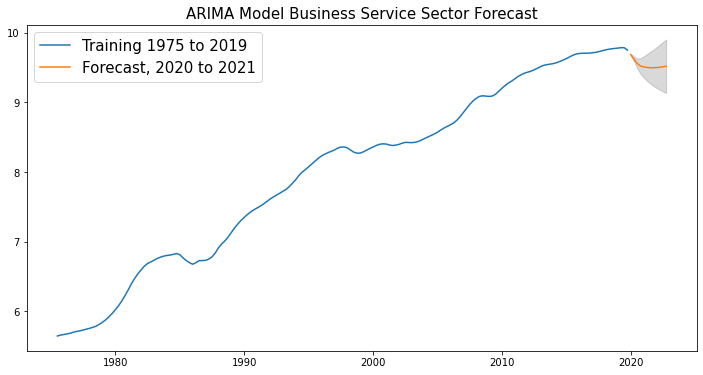

In [24]:
#visualize the prediction
plt.figure(figsize = (12,6))

plt.plot(train_data_1, label = "Training 1975 to 2019")
plt.plot(fc_series, label = "Forecast, 2020 to 2021")
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA Model Business Service Sector Forecast", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [25]:
#summarize prediction result into dataframe
fcast_to_2022 = model_B_fit.predict(178,189,typ = 'levels')
fcast_to_2022_GDP = np.exp(fcast_to_2022)
biz_2019 = np.exp(df_trend_1[-4:])
pd.DataFrame(pd.concat([biz_2019,fcast_to_2022_GDP]).pct_change(), 
             columns = ["Business Service Rate Prediction"])[4:]

,Business Service Rate Prediction
2020-01-01,-0.061546
2020-04-01,-0.062368
2020-07-01,-0.059805
2020-10-01,-0.038476
2021-01-01,-0.012672
2021-04-01,-0.007462
2021-07-01,-0.003793
2021-10-01,-0.000638
2022-01-01,0.002108
2022-04-01,0.004499
